<a href="https://colab.research.google.com/github/MuhammadZafran33/Machine_Learning_Projects_01/blob/main/Copy_of_Diabetes_Detection_Muhammad_zafran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mounted** **Google** **Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

for root, dirs, files in os.walk('/content/drive/MyDrive'):
    if 'archive.zip' in files:
        print(os.path.join(root, 'archive.zip'))


/content/drive/MyDrive/Colab Notebooks/archive.zip


In [ ]:
zip_path = "/content/drive/MyDrive/Colab Notebooks/archive.zip"


# **To Extract the contents from the zip file**

In [ ]:
import zipfile

extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Archive extracted successfully!")


Archive extracted successfully!


# To see the current contents of MY Drive

In [ ]:
import os

os.listdir('/content/drive/MyDrive')


['Colab Notebooks',
 'Classroom',
 'ASSIGNMENT ',
 '20241015_110355.jpg',
 '20241015_110252.jpg',
 '20241015_110154.jpg',
 '20241015_110021.jpg',
 '20241015_105747.jpg',
 '20241015_105510.jpg',
 '20241015_105452.jpg',
 '20241015_105405.jpg',
 '20241015_105231.jpg',
 '20241015_105138.jpg',
 'IMG-20241014-WA0109.jpg',
 'IMG-20241014-WA0107.jpg',
 'IMG-20241014-WA0118.jpg',
 'IMG-20240813-WA0012.jpg',
 '20240518_125530.jpg',
 '20240518_145029.jpg',
 '20240518_145301.jpg',
 '20240518_125526.jpg',
 '20240518_104922.jpg',
 '20240518_104848.jpg',
 '20240307_233740-01.jpeg',
 '20240307_213400-01.jpeg',
 '20240307_233847.jpg',
 '20240307_233740.jpg',
 '20240308_111934.jpg',
 '1000163978-02.jpeg',
 '1000163978-01.jpeg',
 '20220129_135353-01.jpeg',
 '20231220_180307-01.jpeg',
 'Snapchat-750235829-01.jpeg',
 '20220808_200425-01.jpeg',
 'IMG-20231203-WA0087-01.jpeg',
 '20231212_195000-01.jpeg',
 '20231218_150349.jpg',
 'MYXJ_20190823063948_fast.jpg',
 '20230702_194413-04.jpeg',
 '20230702_194413-03

In [ ]:
os.listdir("/content/dataset")


['content']

In [ ]:
os.listdir("/content/dataset/content")


['Diabetic_Balanced_Data', '.config']

In [ ]:
import os

os.listdir("/content/dataset/content/Diabetic_Balanced_Data")


['val', 'test', 'train']

In [ ]:
train_dir = "/content/dataset/content/Diabetic_Balanced_Data/train"
val_dir   = "/content/dataset/content/Diabetic_Balanced_Data/val"


# Path Confirmation

In [ ]:
import os

print(os.path.exists(train_dir))
print(os.path.exists(val_dir))


True
True


# to See the Class folders

In [ ]:
print(os.listdir(train_dir))
print(os.listdir(val_dir))


['4', '1', '0', '2', '3']
['4', '1', '0', '2', '3']


# **Improve Data Loading (with augmentation)**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_data = val_gen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 34792 images belonging to 5 classes.
Found 9940 images belonging to 5 classes.


### **Here We Build a Clean CNN Model**:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  # 5 DR classes

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

# **Train The Model....................**

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=3,
    steps_per_epoch=100,
    validation_steps=50
)


Epoch 1/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3575 - loss: 1.4250

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 492s 5s/step - accuracy: 0.3574 - loss: 1.4251 - val_accuracy: 0.3556 - val_loss: 1.3958
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 499s 5s/step - accuracy: 0.3673 - loss: 1.4087 - val_accuracy: 0.3688 - val_loss: 1.4198
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 491s 5s/step - accuracy: 0.3739 - loss: 1.3890 - val_accuracy: 0.3950 - val_loss: 1.3548


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  # 5 DR classes

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

# Just to overcome the Errors

In [ ]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

drive.mount('/content/drive') # Ensure Google Drive is mounted

train_dir = "/content/dataset/content/Diabetic_Balanced_Data/train"
val_dir   = "/content/dataset/content/Diabetic_Balanced_Data/val"

# Check if directories exist, if not, re-extract the archive
if not os.path.exists(train_dir) or not os.path.exists(val_dir):
    print("Dataset directories not found. Re-extracting archive...")
    # Use the known correct zip_path from previous steps
    zip_path = "/content/drive/MyDrive/Colab Notebooks/archive.zip"
    extract_path = "/content/dataset"
    os.makedirs(extract_path, exist_ok=True) # Ensure extraction target exists
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print("Archive re-extracted successfully!")
    except FileNotFoundError:
        print(f"Error: Zip file not found at {zip_path}. Please ensure it exists.")
        raise # Re-raise the error if the zip itself is missing
else:
    print("Dataset directories found.")

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_data = val_gen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Mounted at /content/drive
Dataset directories not found. Re-extracting archive...
Archive re-extracted successfully!
Found 34792 images belonging to 5 classes.
Found 9940 images belonging to 5 classes.


# **We Ploted Accuracy & Loss**

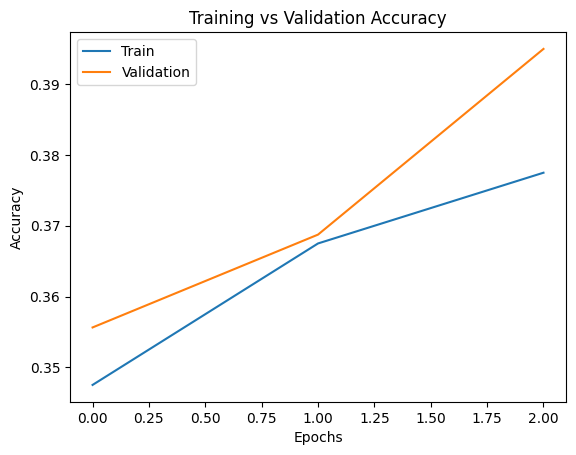

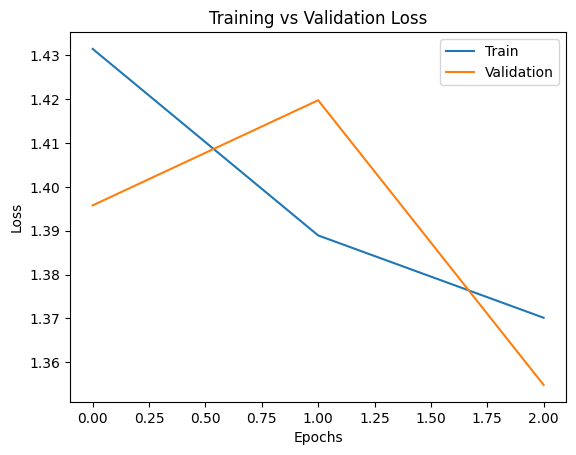

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()


# Just to Save the Model

In [ ]:
model.save("/content/drive/MyDrive/diabetic_retinopathy_cnn.h5")


# **Evaluation Metrics**


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_true = val_data.classes
y_pred = model.predict(val_data)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_true, y_pred))


311/311 ━━━━━━━━━━━━━━━━━━━━ 374s 1s/step
              precision    recall  f1-score   support

           0       0.19      0.30      0.24      2000
           1       0.19      0.18      0.18      1940
           2       0.22      0.25      0.23      2000
           3       0.22      0.08      0.12      2000
           4       0.20      0.20      0.20      2000

    accuracy                           0.20      9940
   macro avg       0.20      0.20      0.19      9940
weighted avg       0.20      0.20      0.19      9940



# **Ended....  Thanks alot ALLAH.................**